In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv(r"C:\Users\91999\Desktop\EV file 1.csv")

In [3]:
df1

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6 sec,233 km/h,450 km,161 Wh/km,940 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0 sec,160 km/h,270 km,167 Wh/km,250 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7 sec,210 km/h,400 km,181 Wh/km,620 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8 sec,180 km/h,360 km,206 Wh/km,560 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5 sec,145 km/h,170 km,168 Wh/km,190 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5 sec,160 km/h,330 km,191 Wh/km,440 km/h,Rapid charging possible,Front Wheel Drive,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5 sec,210 km/h,335 km,258 Wh/km,540 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9 sec,200 km/h,325 km,194 Wh/km,440 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1 sec,200 km/h,375 km,232 Wh/km,450 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Hatchback,C,5,65000


In [4]:
df1.isnull().sum()

Brand          0
Model          0
Accel          0
TopSpeed       0
Range          0
Efficiency     0
FastCharge     0
RapidCharge    0
PowerTrain     0
PlugType       0
BodyStyle      0
Segment        0
Seats          0
PriceEuro      0
dtype: int64

In [5]:
df1.columns

Index(['Brand', 'Model', 'Accel', 'TopSpeed', 'Range', 'Efficiency',
       'FastCharge', 'RapidCharge', 'PowerTrain', 'PlugType', 'BodyStyle',
       'Segment', 'Seats', 'PriceEuro'],
      dtype='object')

Countplot for PowerTrain 

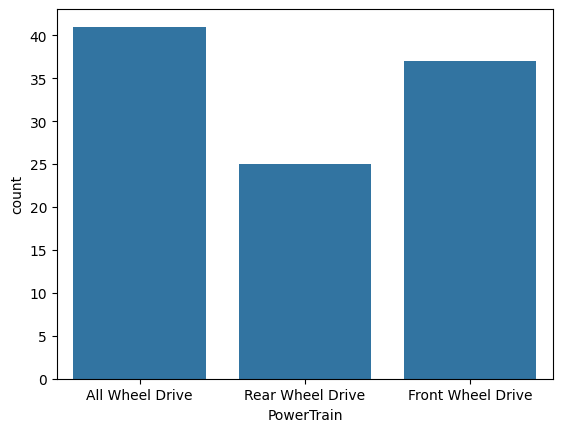

In [6]:
sns.countplot(x ='PowerTrain', data = df1)
plt.show()

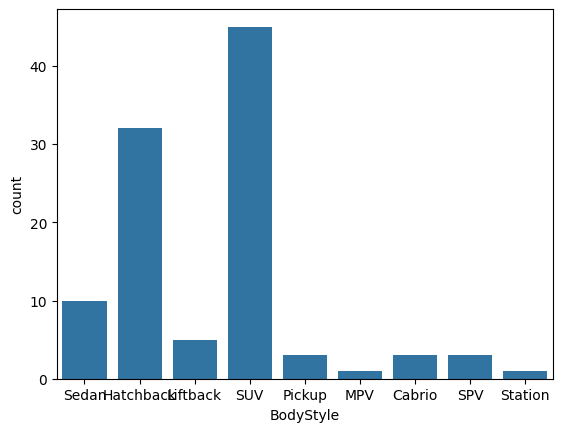

In [7]:
# count vs BodyStyle
sns.countplot(x ='BodyStyle', data = df1)
plt.show()

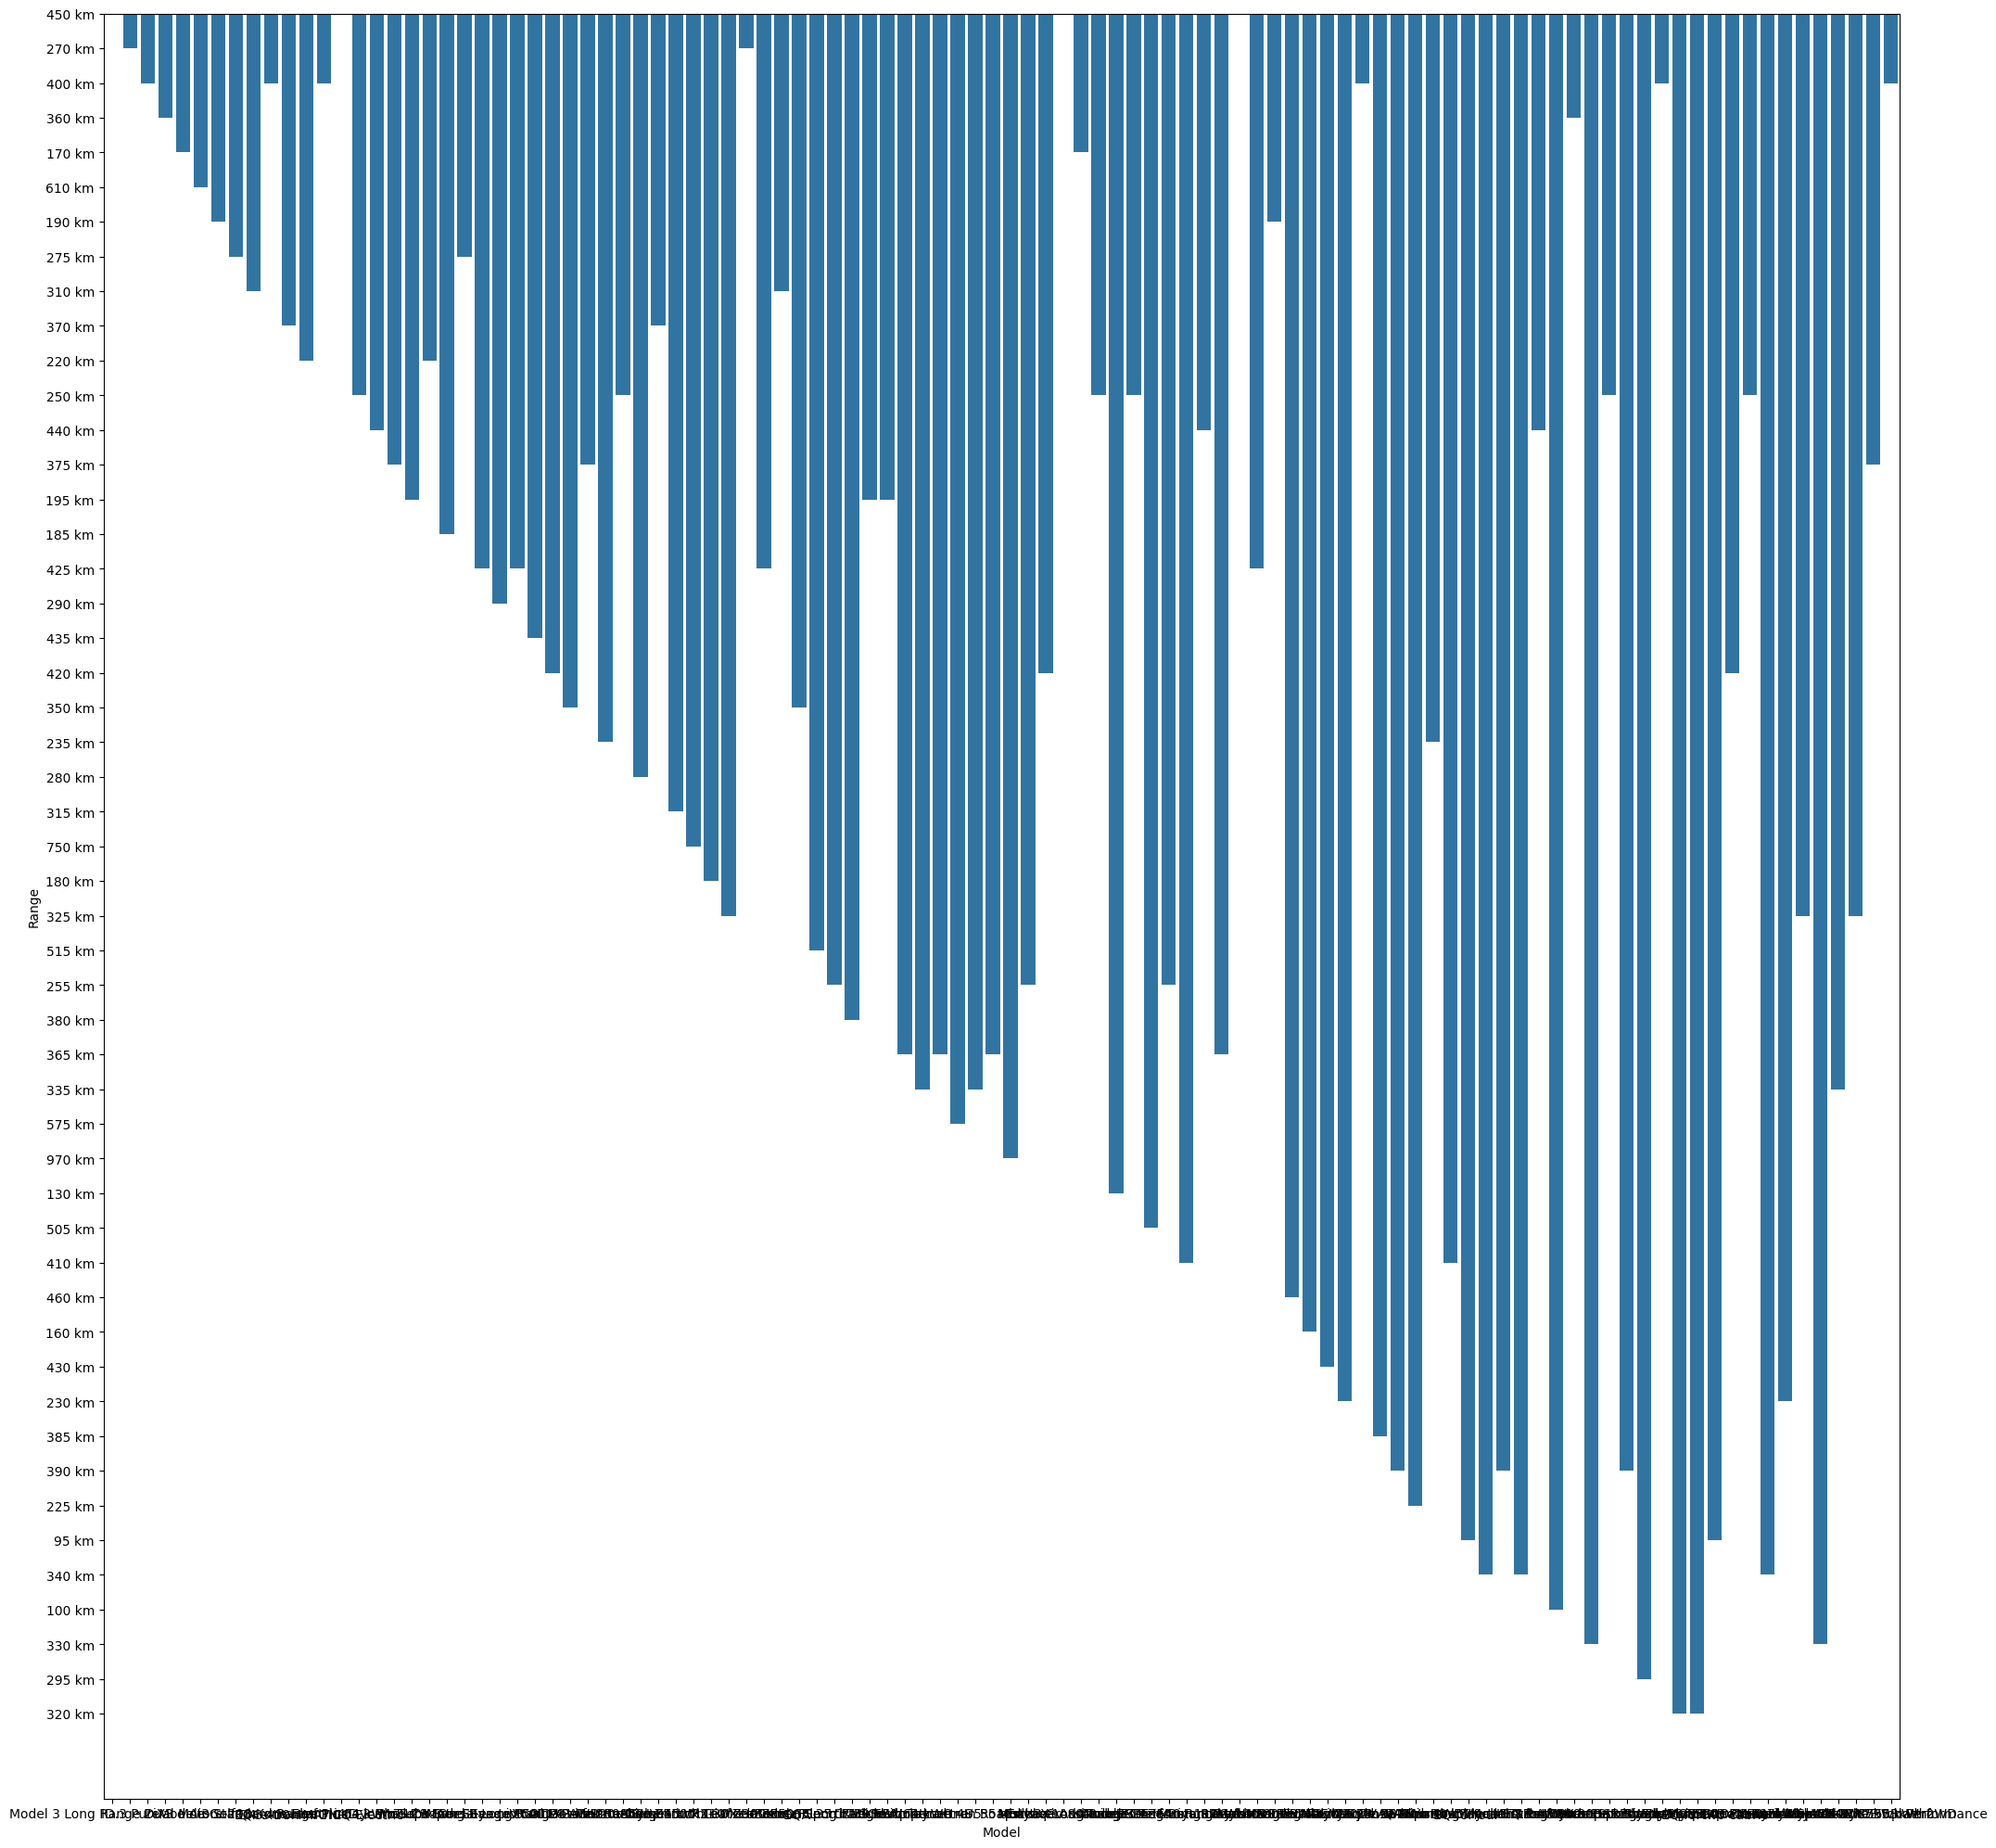

In [8]:
# range vs model
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 25))
sns.barplot(x = 'Model',
			y = 'Range',
			data = df1)

plt.show()


In [11]:
df1['FullName'] = df1['Brand'] + '-' + df1['Model']
df_1 = df1.loc[df1['PriceEuro'] <= 50000]
df_2 = df1.loc[df1['PriceEuro'] > 50000]
t1 = 'Less than 50,000 Euros' 
t2 = 'More than 50,000 Euros'

In [14]:
def range_efficiency(dataframe, text):
      fig = plt.figure(figsize=(20,5))
      ax1 = plt.subplot()
      ax1.bar(dataframe['FullName'], dataframe['Range'],label= 'Range', color= 'darkseagreen')
      plt.legend(loc= 'upper left', bbox_to_anchor = (0, 1.1))
      ax2 = ax1.twinx()
      ax2.scatter(dataframe['FullName'], dataframe['Efficiency'], label= 'Price', color = 'black')
      plt.title('''RANGE (Km) vs Efficiency (Wh/km)of EV's costing {}'''.format(text), fontsize= 20)
      ax1.set_xlabel('Models', size = 20)
      ax1.set_ylabel('Range', color = 'darkseagreen', size = 20)
      ax2.set_ylabel('Efficiency', color= 'black', size= 20)
      plt.legend(loc= 'upper left', bbox_to_anchor = (0, 1))
      ax1.set_xticklabels(df_1['FullName'], rotation = 'vertical')
      plt.show()

C:\Users\91999\AppData\Local\Temp\ipykernel_20220\3437791108.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df_1['FullName'], rotation = 'vertical')


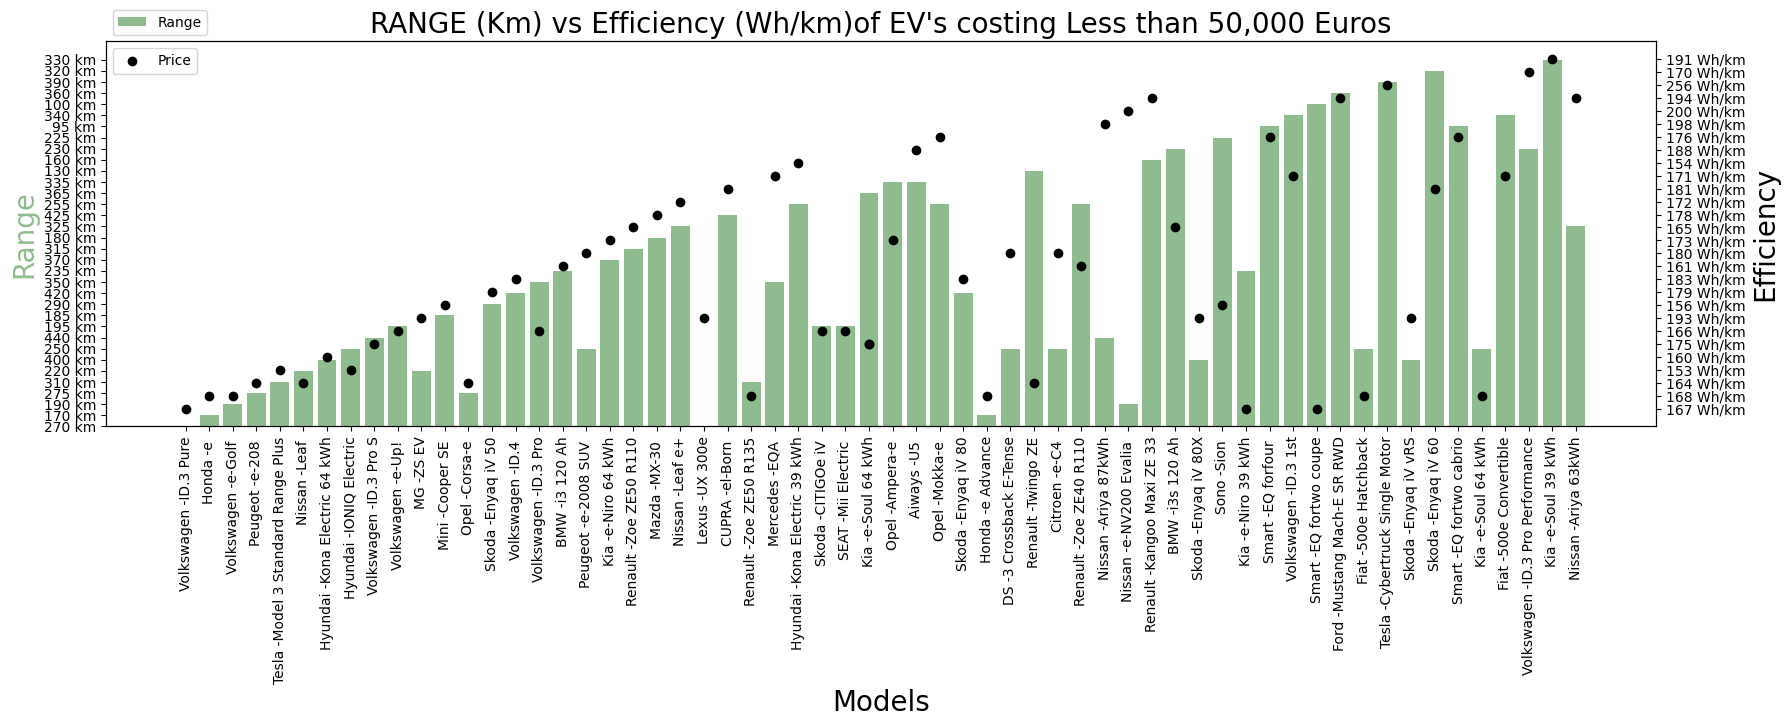

C:\Users\91999\AppData\Local\Temp\ipykernel_20220\3437791108.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df_1['FullName'], rotation = 'vertical')


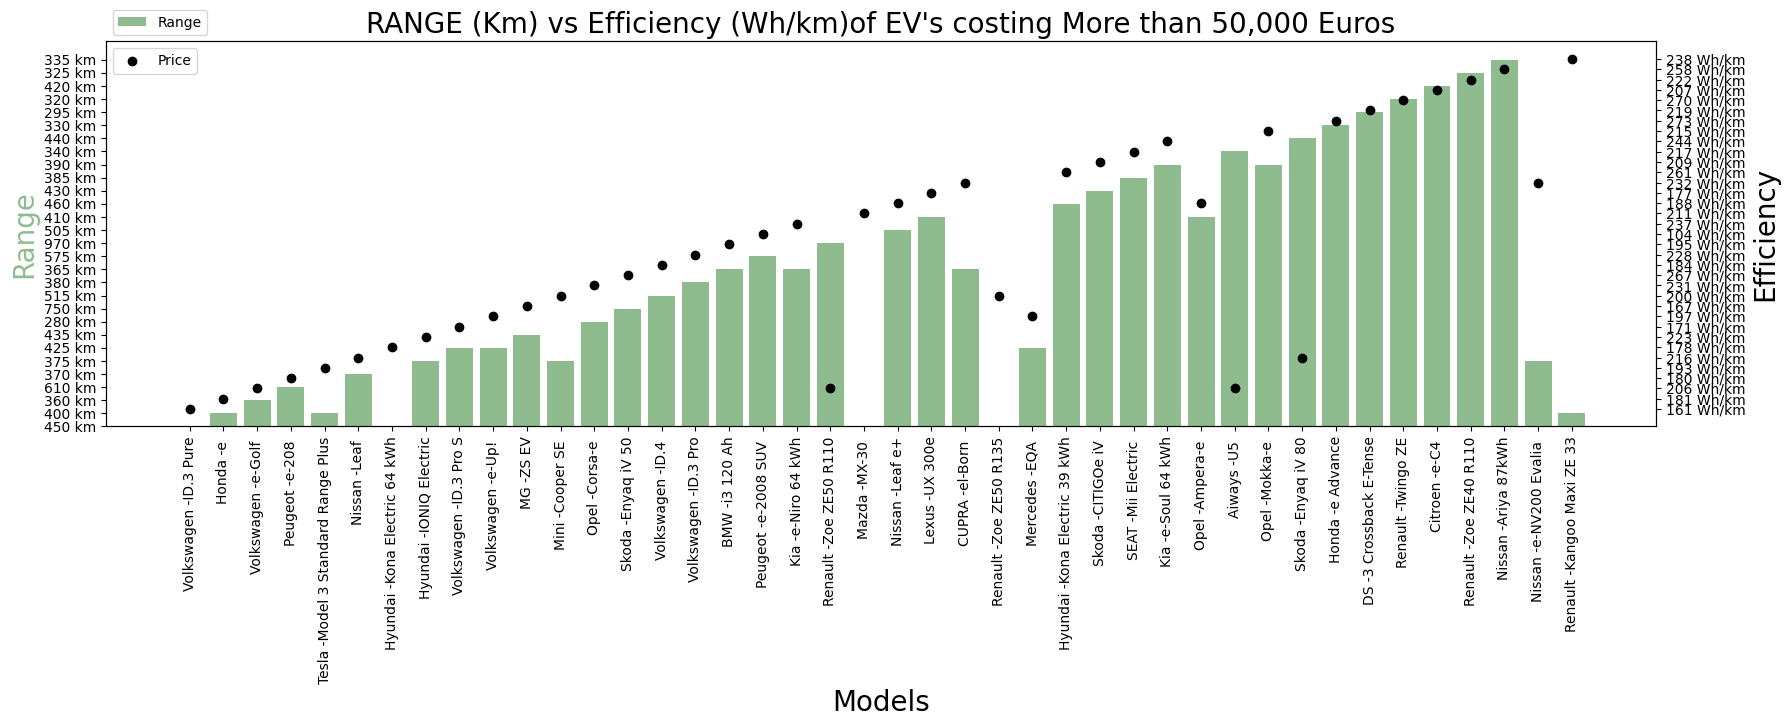

In [15]:
range_efficiency(df_1, t1)
range_efficiency(df_2, t2)

In [27]:
def fastcharge(dataframe, price):
    plt.figure(figsize=(20, 5))
    sns.set_theme(style="whitegrid")
    
    sns.barplot(x='Model', y='FastCharge', data=dataframe, color='lightslategrey')
    
    plt.title('''Fast Charging of EV's costing {} '''.format(price), fontsize=20)
    plt.ylabel('Charging Capacity (kmH)', fontsize=15)
    plt.xlabel('Model', fontsize=15)
    plt.xticks(rotation=90)
    plt.show()

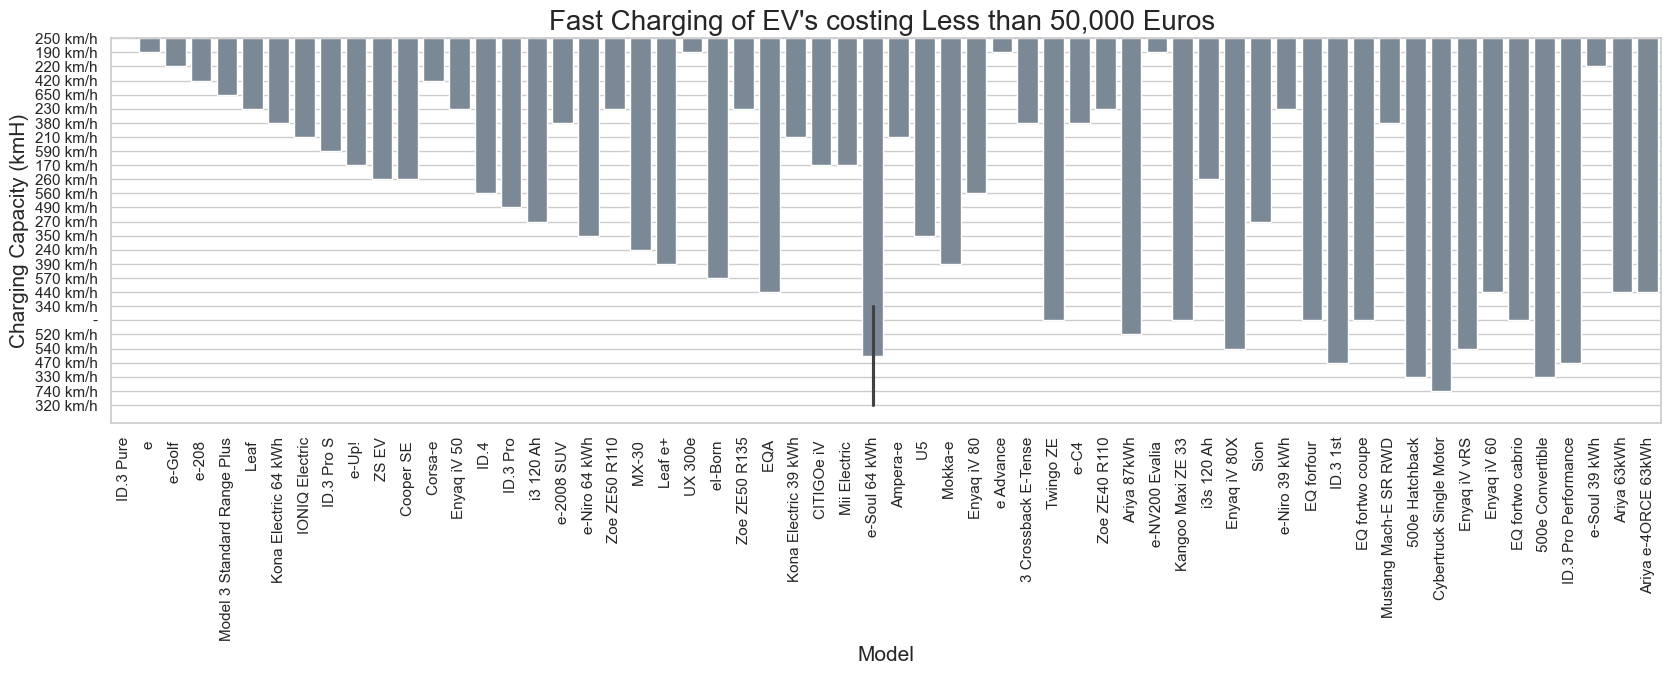

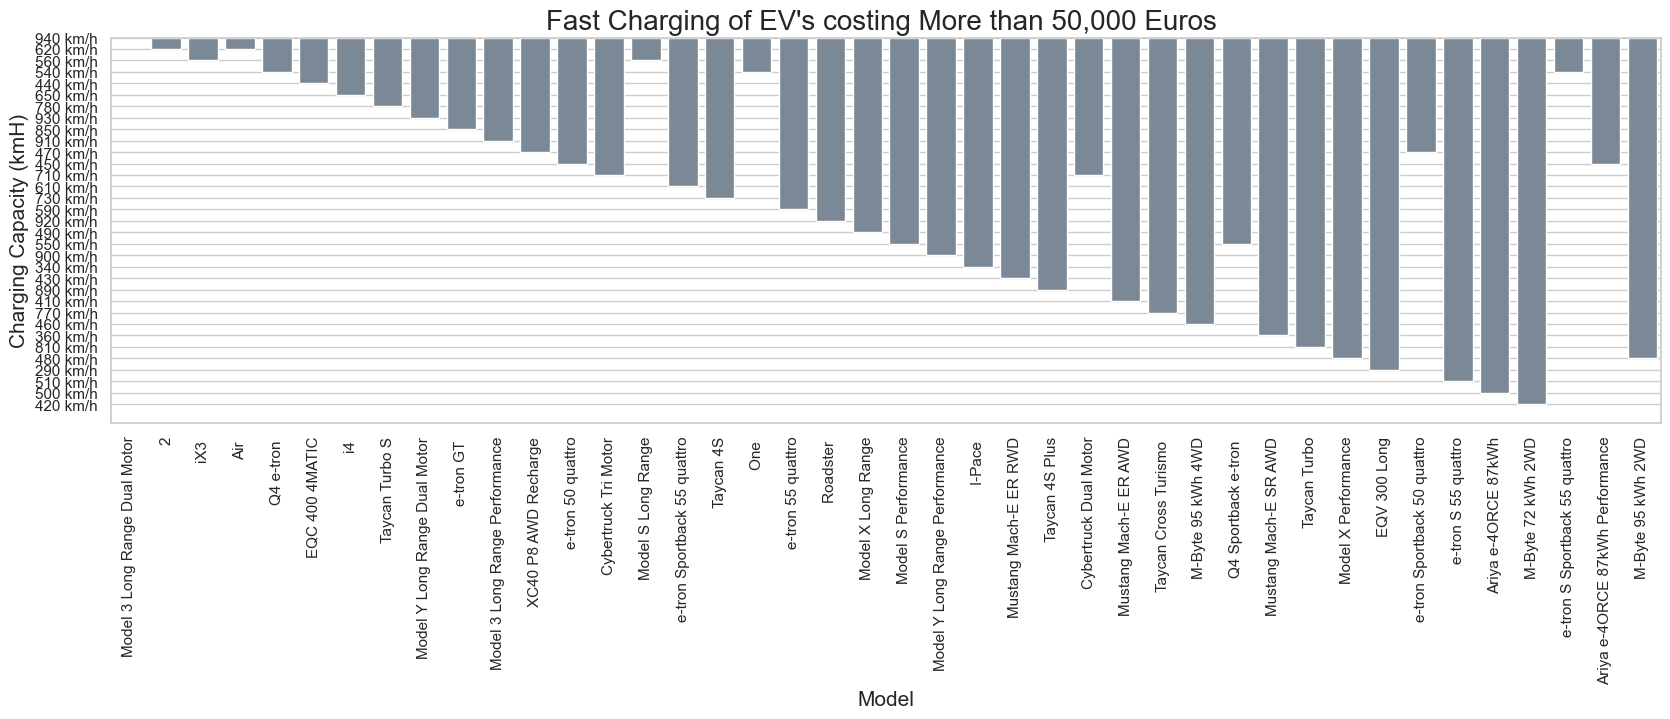

In [28]:
fastcharge(df_1, t1)
fastcharge(df_2, t2)

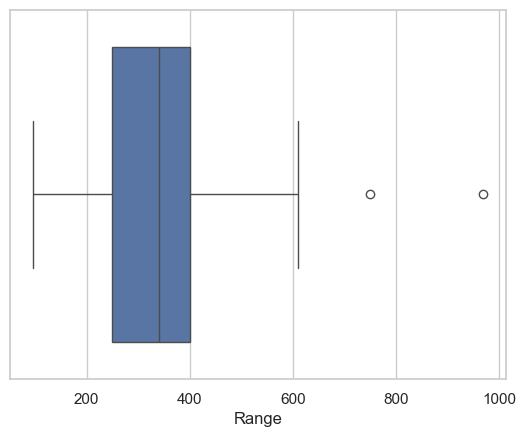

In [74]:
sns.boxplot(x=df1['Range'])
plt.show()

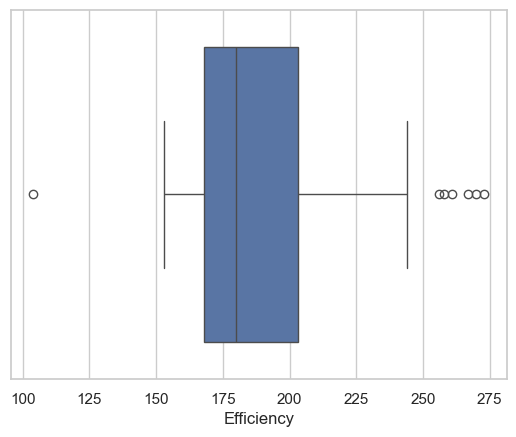

In [75]:
sns.boxplot(x=df1['Efficiency'])
plt.show()

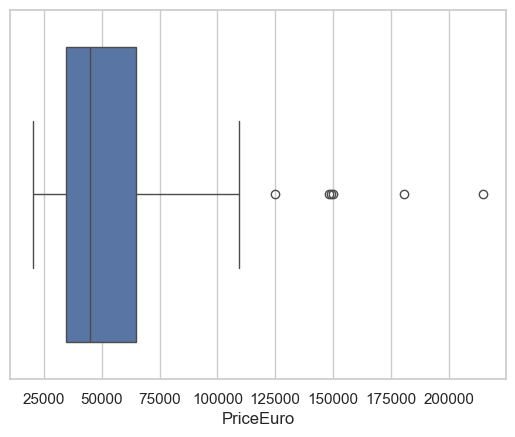

In [77]:
sns.boxplot(x=df1['PriceEuro'])
plt.show()

In [79]:
df = pd.DataFrame(df1)

# Calculate quartiles and IQR
Q1 = df['PriceEuro'].quantile(0.25)
Q3 = df['PriceEuro'].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['PriceEuro'] < lower_bound) | (df['PriceEuro'] > upper_bound)]

# Print outliers
print("Outliers:")
print(outliers)

Outliers:
         Brand                  Model     Accel  TopSpeed  Range  Efficiency   
16    Porsche          Taycan Turbo S   2.8 sec  260 km/h  375.0       223.0  \
23       Audi              e-tron GT    3.5 sec  240 km/h  425.0       197.0   
48  Lightyear                    One   10.0 sec  150 km/h  575.0       104.0   
51      Tesla               Roadster    2.1 sec  410 km/h  970.0       206.0   
72    Porsche   Taycan Cross Turismo    3.5 sec  250 km/h  385.0       217.0   
79    Porsche            Taycan Turbo   3.2 sec  260 km/h  390.0       215.0   

   FastCharge              RapidCharge       PowerTrain    PlugType BodyStyle   
16   780 km/h  Rapid charging possible  All Wheel Drive  Type 2 CCS     Sedan  \
23   850 km/h  Rapid charging possible  All Wheel Drive  Type 2 CCS     Sedan   
48   540 km/h  Rapid charging possible  All Wheel Drive  Type 2 CCS  Liftback   
51   920 km/h  Rapid charging possible  All Wheel Drive  Type 2 CCS    Cabrio   
72   770 km/h  Rapid cha

In [80]:
cleaned_df = df[(df['PriceEuro'] >= lower_bound) & (df['PriceEuro'] <= upper_bound)]

# Print cleaned DataFrame
print("\nCleaned DataFrame:")
print(cleaned_df)


Cleaned DataFrame:
           Brand                            Model     Accel  TopSpeed  Range   
0         Tesla     Model 3 Long Range Dual Motor   4.6 sec  233 km/h  450.0  \
1    Volkswagen                         ID.3 Pure  10.0 sec  160 km/h  270.0   
2      Polestar                                 2   4.7 sec  210 km/h  400.0   
3           BMW                              iX3    6.8 sec  180 km/h  360.0   
4         Honda                                e    9.5 sec  145 km/h  170.0   
..           ...                              ...       ...       ...    ...   
98       Nissan                       Ariya 63kWh   7.5 sec  160 km/h  330.0   
99         Audi     e-tron S Sportback 55 quattro   4.5 sec  210 km/h  335.0   
100      Nissan               Ariya e-4ORCE 63kWh   5.9 sec  200 km/h  325.0   
101      Nissan   Ariya e-4ORCE 87kWh Performance   5.1 sec  200 km/h  375.0   
102       Byton                 M-Byte 95 kWh 2WD   7.5 sec  190 km/h  400.0   

     Efficiency Fas

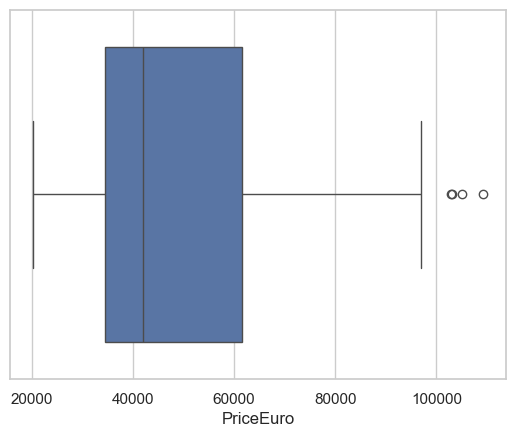

In [81]:
sns.boxplot(x=cleaned_df['PriceEuro'])
plt.show()

In [44]:
df = pd.DataFrame(df1)
df['FastCharge'] = pd.to_numeric(df['FastCharge'].str.extract('(\d+\.?\d*)')[0], errors='coerce')
df['TopSpeed'] = pd.to_numeric(df['TopSpeed'].str.extract('(\d+\.?\d*)')[0], errors='coerce')

print(df)

           Brand                            Model     Accel  TopSpeed  Range   
0         Tesla     Model 3 Long Range Dual Motor   4.6 sec       233  450.0  \
1    Volkswagen                         ID.3 Pure  10.0 sec       160  270.0   
2      Polestar                                 2   4.7 sec       210  400.0   
3           BMW                              iX3    6.8 sec       180  360.0   
4         Honda                                e    9.5 sec       145  170.0   
..           ...                              ...       ...       ...    ...   
98       Nissan                       Ariya 63kWh   7.5 sec       160  330.0   
99         Audi     e-tron S Sportback 55 quattro   4.5 sec       210  335.0   
100      Nissan               Ariya e-4ORCE 63kWh   5.9 sec       200  325.0   
101      Nissan   Ariya e-4ORCE 87kWh Performance   5.1 sec       200  375.0   
102       Byton                 M-Byte 95 kWh 2WD   7.5 sec       190  400.0   

     Efficiency  FastCharge            

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [55]:
X = df[['Range', 'Efficiency']]
y = df['PriceEuro']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [56]:
model = LinearRegression()

In [57]:
model.fit(X_train, y_train)

LinearRegression()

In [64]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE : {mse: .2f}')
print(f'R2 score : {r2: .2f}')

MSE :  1535040123.18
R2 score :  0.40


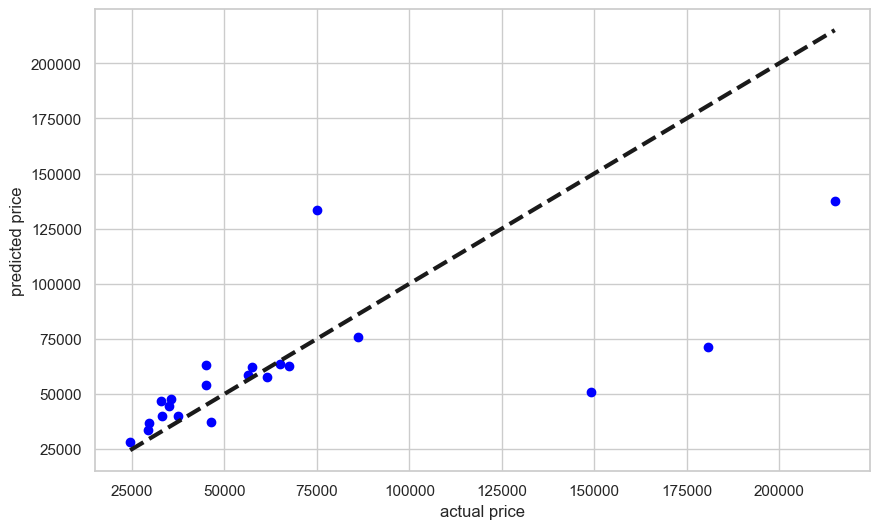

In [65]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.show()

In [67]:
new_data = np.array([[300, 400]])
predicted_data = model.predict(new_data)
print(f'predicted price for new data : ${predicted_data[0]: .2f}')

predicted price for new data : $ 128352.90


c:\Users\91999\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
